In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math

## Load dataset

In [3]:
cols = ["pos", "disp", "adc7", "adc8", "adc9", "adc10"]
cols_to_norm = ["adc7", "adc8", "adc9", "adc10"]

df = pd.DataFrame(columns=cols)

with open("output_2023-11-13.txt", "r") as f:
    for i, line in enumerate(f.readlines()):
        line_list = line.split(" ")
#         print(line_list)
        line_list[-1] = line_list[-1].split(";\n")[0]
        line_list = [val for val in line_list if len(val) > 0]
        line_list[-1] = line_list[-1].split(";\n")[0]
        if len(line_list) != 6:
            raise ValueError(f"line {i} wrong shape")
        for j, val in enumerate(line_list):
            line_list[j] = float(val)
#         print(f"{i}: {line_list} {len(line_list)}")
#         print(line_list)
        df.loc[i] = line_list
    
df.sort_values(["pos", "disp"], inplace=True)

for col in cols_to_norm:
    print(df[col].max())
    df[col] = df[col] * 1/df[col].max()
    print(df[col].max())

print("opened and normalised main dataset")

print(df)

0.667248
1.0
0.669643
1.0
0.670602
1.0
0.676472
1.0
opened and normalised main dataset
        pos  disp      adc7      adc8      adc9     adc10
50      0.0  25.0  0.993548  0.989133  0.967030  0.956866
51      0.0  25.0  0.993310  0.988897  0.966798  0.956687
52      0.0  25.0  0.995786  0.991298  0.969153  0.959067
53      0.0  25.0  0.995933  0.991443  0.969395  0.959321
54      0.0  25.0  0.995688  0.991258  0.969190  0.959151
...     ...   ...       ...       ...       ...       ...
2805  500.0  30.0  0.999321  0.999548  0.999035  0.998896
2806  500.0  30.0  0.997335  0.997564  0.997073  0.996887
2807  500.0  30.0  0.997108  0.997372  0.996861  0.996650
2808  500.0  30.0  0.997646  0.997903  0.997370  0.997218
2809  500.0  30.0  0.999162  0.999419  0.998920  0.998782

[2890 rows x 6 columns]


In [4]:
pos_values = df["pos"].unique().tolist()
disp_values = df["disp"].unique().tolist()

pos_values.sort()
disp_values.sort()

pos_value_counts = df["pos"].value_counts()
disp_value_counts = df["disp"].value_counts()

print(pos_value_counts)
print(disp_value_counts)

260.0    120
180.0    120
320.0    120
300.0    120
280.0    120
240.0    120
220.0    120
400.0    120
200.0    120
160.0    120
140.0    120
120.0    120
100.0    120
380.0    120
340.0    110
360.0    110
420.0    100
440.0    100
460.0    100
480.0    100
0.0      100
20.0     100
80.0     100
60.0     100
500.0    100
40.0      90
Name: pos, dtype: int64
25.0    690
30.0    660
20.0    460
15.0    420
10.0    360
5.0     300
Name: disp, dtype: int64


## Plot displacement counts at each position

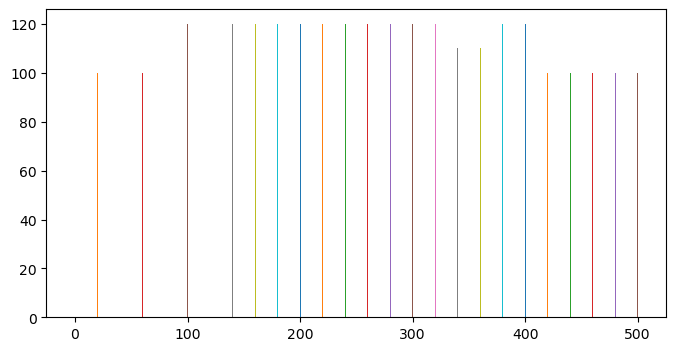

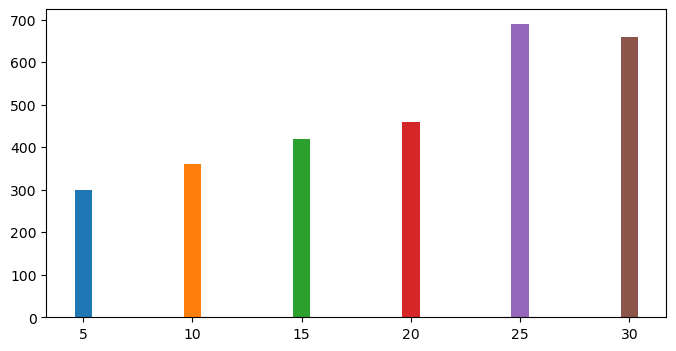

In [5]:
plt.figure(figsize=(8,4))
for pos in pos_values:
    plt.bar(pos, pos_value_counts[pos])   
plt.show()

plt.figure(figsize=(8,4))
for disp in disp_values:
    plt.bar(disp, disp_value_counts[disp])   
plt.show()

## Plot sensor values by position at each displacement amount

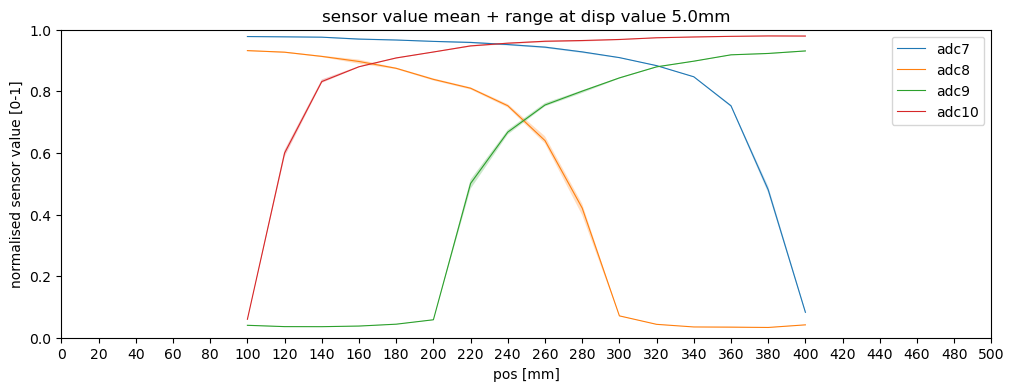

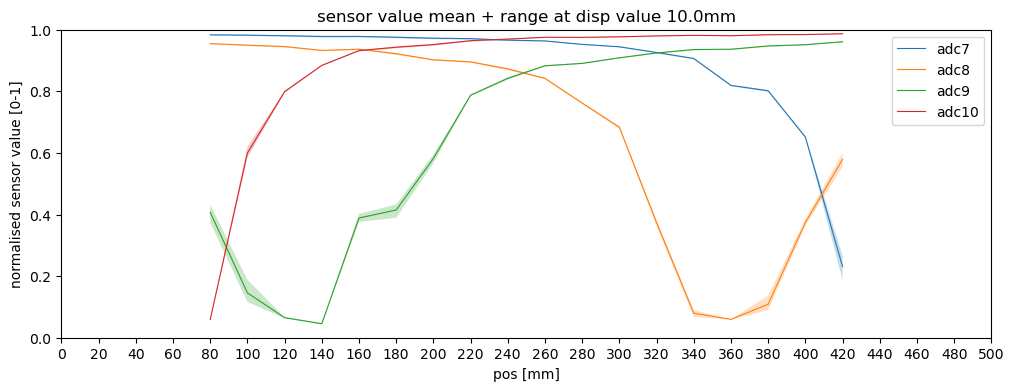

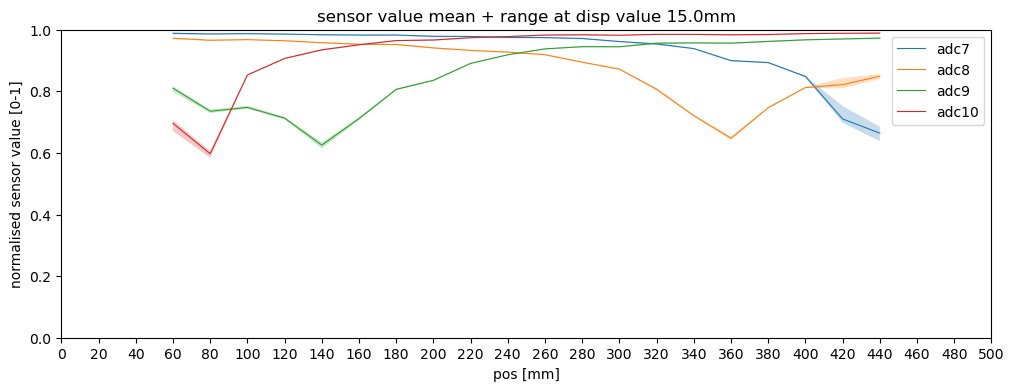

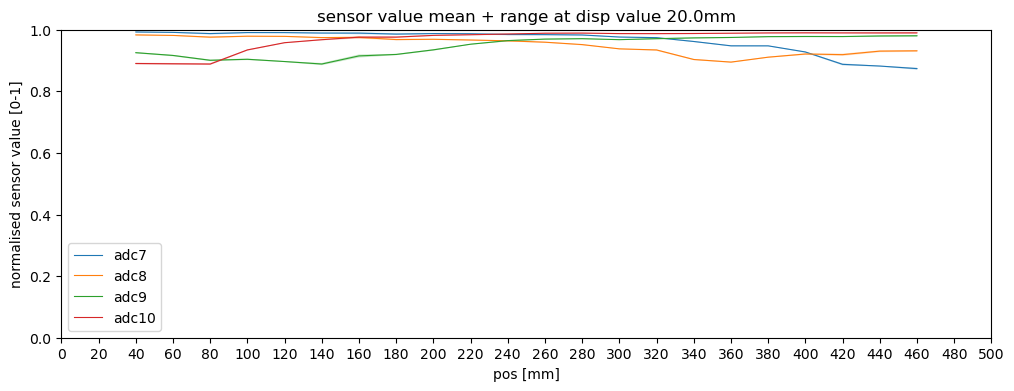

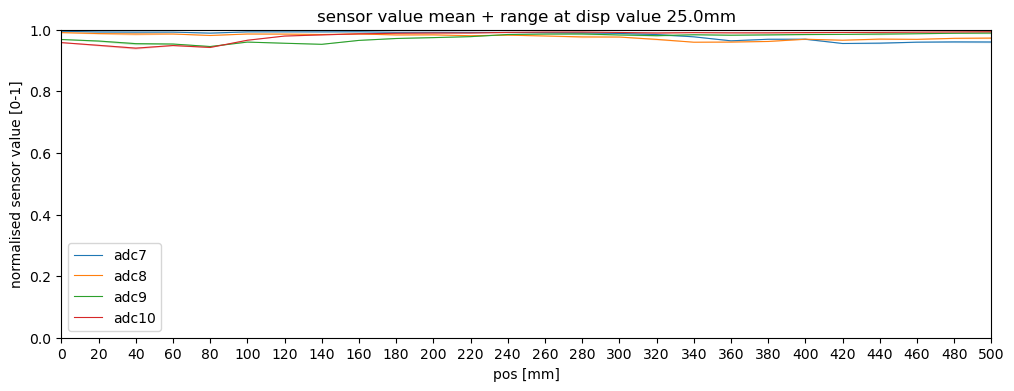

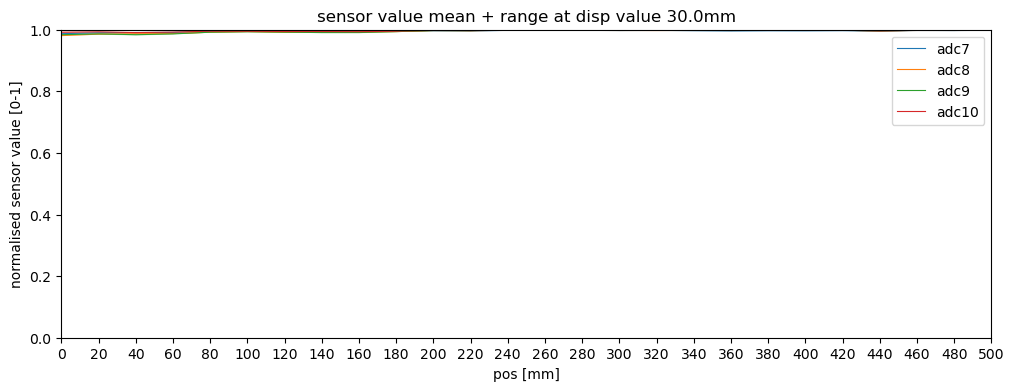

In [6]:
adc_cols = ["adc7", "adc8", "adc9", "adc10"]

for i, disp in enumerate(disp_values):
    plt.figure(figsize=(12,4))
    disp_df = df[df["disp"] == disp]
    for adc in adc_cols:
        adc_dict = {}
        for pos in pos_values:
            this_pos_cells = disp_df[disp_df["pos"] == pos]
            adc_mean = this_pos_cells[adc].mean()
            adc_min = this_pos_cells[adc].min()
            adc_max = this_pos_cells[adc].max()
            adc_dict[pos] = [adc_mean, adc_min, adc_max]

        adc_means = [adc_dict[pos][0] for pos in adc_dict.keys()]
        adc_mins = [adc_dict[pos][1] for pos in adc_dict.keys()]
        adc_maxes = [adc_dict[pos][2] for pos in adc_dict.keys()]
        
        plt.fill_between(pos_values, adc_mins, adc_maxes, alpha=0.25)
        plt.plot(pos_values, adc_means, linewidth=0.8, label=adc)

    plt.ylim(0,1)
    plt.xlim(0,500)
    plt.title(f"sensor value mean + range at disp value {disp}mm")
    plt.xlabel("pos [mm]")
    plt.ylabel("normalised sensor value [0-1]")
    plt.xticks(pos_values)
    plt.legend()
    plt.savefig(f"./figures/sensor_values_{disp}mm.png", dpi=450)
    plt.show()

In [86]:
df.sort_values(["pos", "disp"], inplace=True)

with open("output_formatted_2023-11-13.txt", "w") as f:
    df_as_txt = df.to_string(header=False, index=False)
    split_df_txt = df_as_txt.split("\n")
    list_string = ""
    for k, row in enumerate(split_df_txt):
        split_df_txt[k] = split_df_txt[k] + ";\n"
        list_string += split_df_txt[k]
    f.write(list_string)

### Cell below: unused code for reversing the dataset and appending
The dataset should theoretically be reversable i.e., pos 100mm at 10mm displacement is the inverse of pos 400mm at 10mm displacement when the sensor order is reversed such that adc7 becomes adc10, adc8 becomes adc9, etc.

In [ ]:
# with open("output_2023-11-03.txt", "r") as f:
#     for i, line in enumerate(f.readlines()):
#         line_list = line.split(" ")
# #         print(line_list)
#         line_list[-1] = line_list[-1].split(";\n")[0]
#         line_list = [val for val in line_list if len(val) > 0]
#         line_list[-1] = line_list[-1].split(";\n")[0]
#         if len(line_list) != 6:
#             raise ValueError(f"line {i} wrong shape")
#         for j, val in enumerate(line_list):
#             line_list[j] = float(val)
# #         print(f"{i}: {line_list} {len(line_list)}")
# #         print(line_list)
#         df_1103.loc[i] = line_list
    
# df_1103.sort_values("disp", inplace=True)
# df_1103.sort_values("pos", inplace=True)

# for col in cols_to_norm:
#     print(df_1103[col].max())
#     df_1103[col] = df_1103[col] * 1/df_1103[col].max()
#     print(df_1103[col].max())



# df = pd.concat([df_1103, df_1113])
# df = df.reset_index(drop=True)

# df_rev = df.copy(deep=True)

# df_rev = df_rev.iloc[::-1]
# df_rev.sort_values(["pos", "disp"], ascending=[False, True], inplace=True)
# df_rev.drop(["pos", "disp"], axis=1, inplace=True)
# df_rev = df_rev.reset_index(drop=True)
# print(df_rev)
# df_rev = df_rev.join(df["pos"])
# df_rev = df_rev.join(df["disp"])
# print(df_rev)

# df_rev = pd.DataFrame(columns=cols)

# print("reversing dataset")

# df_rev = df.copy(deep=True)

# for i, row in df_rev.iterrows():
#     row_pos = row["pos"]
#     df_rev.loc[i, "pos"] = 500 - row_pos

# for pos in df["pos"].unique():
#     this_pos_df = df.loc[df["pos"] == pos]
#     for disp in this_pos_df["disp"].unique():
#         this_disp_df = this_pos_df.loc[this_pos_df["disp"] == disp]
#         for i, row in this_disp_df.iterrows():
#             row_pos = row["pos"]
#             df_rev_len = len(df_rev)
#             df_rev.loc[df_rev_len] = row
#             df_rev.loc[df_rev_len, "pos"] = 500 - row_pos
# #             print(df_rev.iloc[-1])

# df_rev.dropna(inplace=True)
# print(df_rev)
# df_rev.rename({"adc7" : "adc10", "adc8" : "adc9", "adc9" : "adc8", "adc10" : "adc7"}, axis=1, inplace=True)

# print("combining dataset and reversed dataset")

# df = pd.concat([df, df_rev])